# Análisis Casos COVID-19 en Colombia

In [1]:
#Cargar los módulos más comunes, con sus alias
import numpy as pd
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#cargar el CSV desde datos.gov.co en un dataframe
covid = pd.read_csv('https://www.datos.gov.co/resource/gt2j-8ykr.csv')

In [3]:
#revisa el dataframe
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_reporte_web      1000 non-null   object 
 1   id_de_caso             1000 non-null   int64  
 2   fecha_de_notificaci_n  1000 non-null   object 
 3   departamento           1000 non-null   int64  
 4   departamento_nom       1000 non-null   object 
 5   ciudad_municipio       1000 non-null   int64  
 6   ciudad_municipio_nom   1000 non-null   object 
 7   edad                   1000 non-null   int64  
 8   unidad_medida          1000 non-null   int64  
 9   sexo                   1000 non-null   object 
 10  fuente_tipo_contagio   1000 non-null   object 
 11  ubicacion              996 non-null    object 
 12  estado                 996 non-null    object 
 13  pais_viajo_1_cod       477 non-null    float64
 14  pais_viajo_1_nom       477 non-null    object 
 15  recup

In [4]:
covid.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'per_etn_', 'nom_grupo_'],
      dtype='object')

In [5]:
covid.shape

(1000, 23)

In [6]:
covid.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN


In [7]:
covid.tail()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
995,1/4/2020 0:00:00,996,22/3/2020 0:00:00,25,CUNDINAMARCA,25430,MADRID,30,1,F,...,NaN,NaN,Recuperado,19/3/2020 0:00:00,NaN,1/4/2020 0:00:00,8/4/2020 0:00:00,PCR,6,NaN
996,1/4/2020 0:00:00,997,27/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,44,1,F,...,NaN,NaN,Recuperado,21/3/2020 0:00:00,NaN,1/4/2020 0:00:00,5/5/2020 0:00:00,PCR,6,NaN
997,1/4/2020 0:00:00,998,21/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,17,1,F,...,NaN,NaN,Recuperado,17/3/2020 0:00:00,NaN,1/4/2020 0:00:00,5/5/2020 0:00:00,PCR,6,NaN
998,1/4/2020 0:00:00,999,24/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,39,1,F,...,NaN,NaN,Recuperado,18/3/2020 0:00:00,NaN,1/4/2020 0:00:00,15/4/2020 0:00:00,PCR,6,NaN
999,1/4/2020 0:00:00,1000,27/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,30,1,F,...,NaN,NaN,Recuperado,18/3/2020 0:00:00,NaN,1/4/2020 0:00:00,3/4/2020 0:00:00,PCR,6,NaN


In [8]:
covid['edad'].describe()

count    1000.000000
mean       42.128000
std        16.900688
min         1.000000
25%        29.000000
50%        40.000000
75%        54.000000
max        88.000000
Name: edad, dtype: float64

In [29]:
covid['edad']

0      19
1      34
2      50
3      55
4      25
       ..
995    30
996    44
997    17
998    39
999    30
Name: edad, Length: 1000, dtype: int64

In [9]:
#seleccionar solo algunas columnas de interes
covid[['ciudad_municipio', 'sexo', 'edad']]

,ciudad_municipio,sexo,edad
0,11001,F,19
1,76111,M,34
2,5001,F,50
3,5001,M,55
4,5001,M,25
...,...,...,...
995,25430,F,30
996,11001,F,44
997,11001,F,17
998,11001,F,39


In [11]:
#ordenar por dos columnas
covid.sort_values(by=['ciudad_municipio_nom', 'edad'], ascending=True)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
355,24/3/2020 0:00:00,356,21/3/2020 0:00:00,25,CUNDINAMARCA,25035,ANAPOIMA,32,1,M,...,724.0,ESPAÑA,Recuperado,11/3/2020 0:00:00,NaN,24/3/2020 0:00:00,11/4/2020 0:00:00,PCR,6,NaN
129,20/3/2020 0:00:00,130,18/3/2020 0:00:00,25,CUNDINAMARCA,25035,ANAPOIMA,53,1,M,...,840.0,ESTADOS UNIDOS DE AMÉRICA,Recuperado,16/3/2020 0:00:00,NaN,20/3/2020 0:00:00,30/3/2020 0:00:00,PCR,6,NaN
300,23/3/2020 0:00:00,301,19/3/2020 0:00:00,5,ANTIOQUIA,5045,APARTADO,29,1,F,...,792.0,TURQUÍA,Recuperado,14/3/2020 0:00:00,NaN,23/3/2020 0:00:00,3/4/2020 0:00:00,PCR,6,NaN
701,29/3/2020 0:00:00,702,21/3/2020 0:00:00,13,BOLIVAR,13052,ARJONA,22,1,F,...,792.0,TURQUÍA,Recuperado,19/3/2020 0:00:00,NaN,29/3/2020 0:00:00,5/5/2020 0:00:00,PCR,6,NaN
700,29/3/2020 0:00:00,701,23/3/2020 0:00:00,13,BOLIVAR,13052,ARJONA,25,1,M,...,NaN,NaN,Recuperado,21/3/2020 0:00:00,NaN,29/3/2020 0:00:00,5/5/2020 0:00:00,PCR,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,31/3/2020 0:00:00,807,17/3/2020 0:00:00,76,VALLE,76892,YUMBO,32,1,M,...,724.0,ESPAÑA,Recuperado,NaN,NaN,31/3/2020 0:00:00,24/5/2020 0:00:00,PCR,6,NaN
225,22/3/2020 0:00:00,226,19/3/2020 0:00:00,76,VALLE,76892,YUMBO,41,1,F,...,NaN,NaN,Recuperado,16/3/2020 0:00:00,NaN,22/3/2020 0:00:00,8/5/2020 0:00:00,PCR,6,NaN
921,1/4/2020 0:00:00,922,25/3/2020 0:00:00,76,VALLE,76892,YUMBO,68,1,F,...,724.0,ESPAÑA,Recuperado,25/3/2020 0:00:00,NaN,1/4/2020 0:00:00,5/4/2020 0:00:00,PCR,6,NaN
187,21/3/2020 0:00:00,188,17/3/2020 0:00:00,76,VALLE,76892,YUMBO,70,1,F,...,NaN,NaN,Fallecido,8/3/2020 0:00:00,22/3/2020 0:00:00,21/3/2020 0:00:00,NaN,NaN,6,NaN


In [14]:
#cuántas personas con sus edades, hay infectadas por municipio?
c2 = covid[['ciudad_municipio_nom', 'sexo', 'edad']]
c2.groupby(['ciudad_municipio_nom']).describe()

edad                                                  \
                     count       mean        std   min    25%   50%    75%   
ciudad_municipio_nom                                                         
ANAPOIMA               2.0  42.500000  14.849242  32.0  37.25  42.5  47.75   
APARTADO               1.0  29.000000        NaN  29.0  29.00  29.0  29.00   
ARJONA                 2.0  23.500000   2.121320  22.0  22.75  23.5  24.25   
ARMENIA               15.0  40.666667  16.736046  18.0  29.50  37.0  54.00   
BARRANQUILLA          31.0  37.258065  17.013657   1.0  25.00  32.0  51.00   
...                    ...        ...        ...   ...    ...   ...    ...   
VILLETA                2.0  38.500000   7.778175  33.0  35.75  38.5  41.25   
VITERBO                2.0  26.500000  16.263456  15.0  20.75  26.5  32.25   
YOPAL                  2.0  32.000000   8.485281  26.0  29.00  32.0  35.00   
YUMBO                  7.0  37.857143  24.272265   4.0  25.00  32.0  54.50   
ZIPAQUIRA              1.0  81.000000        NaN  81.0  81.00  81.0  81.00   

                            
                       max  
ciudad_municipio_nom        
ANAPOIMA              53.0  
APARTADO              29.0  
ARJONA                25.0  
ARMENIA               72.0  
BARRANQUILLA          77.0  
...                    ...  
VILLETA               44.0  
VITERBO               38.0  
YOPAL                 38.0  
YUMBO                 70.0  
ZIPAQUIRA             81.0  

[95 rows x 8 columns]

In [15]:
#cuántas personas con su sexo, hay infectadas por municipio?
c2 = covid[['ciudad_municipio_nom', 'sexo', 'edad']]
c2.groupby(['ciudad_municipio_nom'])['sexo'].describe()

,count,unique,top,freq
ciudad_municipio_nom,,,,
ANAPOIMA,2,1,M,2
APARTADO,1,1,F,1
ARJONA,2,2,F,1
ARMENIA,15,2,F,8
BARRANQUILLA,31,2,M,19
...,...,...,...,...
VILLETA,2,2,F,1
VITERBO,2,1,F,2
YOPAL,2,2,F,1


In [42]:
#cuántas personas con sus edades, hay infectadas por municipio?
c2.groupby(['ciudad_municipio_nom'])[['edad']].describe()

edad                                                  \
                     count       mean        std   min    25%   50%    75%   
ciudad_municipio_nom                                                         
ANAPOIMA               2.0  42.500000  14.849242  32.0  37.25  42.5  47.75   
APARTADO               1.0  29.000000        NaN  29.0  29.00  29.0  29.00   
ARJONA                 2.0  23.500000   2.121320  22.0  22.75  23.5  24.25   
ARMENIA               15.0  40.666667  16.736046  18.0  29.50  37.0  54.00   
BARRANQUILLA          31.0  37.258065  17.013657   1.0  25.00  32.0  51.00   
...                    ...        ...        ...   ...    ...   ...    ...   
VILLETA                2.0  38.500000   7.778175  33.0  35.75  38.5  41.25   
VITERBO                2.0  26.500000  16.263456  15.0  20.75  26.5  32.25   
YOPAL                  2.0  32.000000   8.485281  26.0  29.00  32.0  35.00   
YUMBO                  7.0  37.857143  24.272265   4.0  25.00  32.0  54.50   
ZIPAQUIRA              1.0  81.000000        NaN  81.0  81.00  81.0  81.00   

                            
                       max  
ciudad_municipio_nom        
ANAPOIMA              53.0  
APARTADO              29.0  
ARJONA                25.0  
ARMENIA               72.0  
BARRANQUILLA          77.0  
...                    ...  
VILLETA               44.0  
VITERBO               38.0  
YOPAL                 38.0  
YUMBO                 70.0  
ZIPAQUIRA             81.0  

[95 rows x 8 columns]

In [47]:
cd = covid.groupby(['departamento_nom'])[['edad']].describe()
cd

edad                                                      
                  count       mean        std   min    25%   50%    75%   max
departamento_nom                                                             
ANTIOQUIA         106.0  40.386792  17.443007   5.0  28.00  36.5  52.00  87.0
ATLANTICO           4.0  33.500000  17.483325  16.0  19.75  34.0  47.75  50.0
BARRANQUILLA       31.0  37.258065  17.013657   1.0  25.00  32.0  51.00  77.0
BOGOTA            401.0  43.014963  16.041813   2.0  31.00  41.0  54.00  85.0
BOLIVAR             3.0  35.000000  19.974984  22.0  23.50  25.0  41.50  58.0
BOYACA              6.0  70.833333   8.658329  57.0  69.25  71.0  72.75  84.0
CALDAS             15.0  41.666667  20.450870  15.0  25.50  38.0  58.00  81.0
CARTAGENA          39.0  40.051282  15.435688  16.0  28.50  38.0  49.50  85.0
CASANARE            2.0  32.000000   8.485281  26.0  29.00  32.0  35.00  38.0
CAUCA              12.0  35.333333  15.387913   3.0  30.50  32.5  45.75  61.0
CESAR              16.0  34.875000  11.988189  16.0  29.25  33.0  38.50  70.0
CORDOBA             2.0  32.000000   4.242641  29.0  30.50  32.0  33.50  35.0
CUNDINAMARCA       49.0  42.734694  14.394408  15.0  31.00  43.0  54.00  81.0
GUAJIRA             1.0  42.000000        NaN  42.0  42.00  42.0  42.00  42.0
HUILA              30.0  49.333333  17.921925  21.0  33.75  48.5  63.25  83.0
MAGDALENA           1.0  28.000000        NaN  28.0  28.00  28.0  28.00  28.0
META               12.0  40.166667  16.862186  29.0  29.00  31.0  46.75  80.0
NARIÑO              6.0  52.166667  23.903277   6.0  54.75  57.5  61.00  76.0
NORTE SANTANDER    19.0  39.894737  16.934169  18.0  26.50  42.0  49.50  77.0
QUINDIO            23.0  37.608696  16.444781   9.0  24.50  35.0  48.00  72.0
RISARALDA          34.0  43.264706  20.335532   6.0  28.25  45.0  61.00  79.0
SAN ANDRES          2.0  33.500000   3.535534  31.0  32.25  33.5  34.75  36.0
SANTANDER          12.0  41.166667  17.481592  24.0  25.00  36.5  51.00  80.0
STA MARTA D.E.     11.0  53.818182  20.836594  20.0  42.00  49.0  66.50  88.0
SUCRE               1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0
TOLIMA             14.0  40.000000  16.627133  16.0  26.00  40.0  55.00  63.0
VALLE             148.0  41.993243  17.431107   4.0  28.00  41.0  54.25  88.0

In [48]:
cd.shape

(27, 8)

In [49]:
cd.columns

MultiIndex([('edad', 'count'),
            ('edad',  'mean'),
            ('edad',   'std'),
            ('edad',   'min'),
            ('edad',   '25%'),
            ('edad',   '50%'),
            ('edad',   '75%'),
            ('edad',   'max')],
           )

In [50]:
cd.columns = cd.columns.droplevel(0)

In [51]:
cd.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [52]:
cd['count']

departamento_nom
ANTIOQUIA          106.0
ATLANTICO            4.0
BARRANQUILLA        31.0
BOGOTA             401.0
BOLIVAR              3.0
BOYACA               6.0
CALDAS              15.0
CARTAGENA           39.0
CASANARE             2.0
CAUCA               12.0
CESAR               16.0
CORDOBA              2.0
CUNDINAMARCA        49.0
GUAJIRA              1.0
HUILA               30.0
MAGDALENA            1.0
META                12.0
NARIÑO               6.0
NORTE SANTANDER     19.0
QUINDIO             23.0
RISARALDA           34.0
SAN ANDRES           2.0
SANTANDER           12.0
STA MARTA D.E.      11.0
SUCRE                1.0
TOLIMA              14.0
VALLE              148.0
Name: count, dtype: float64

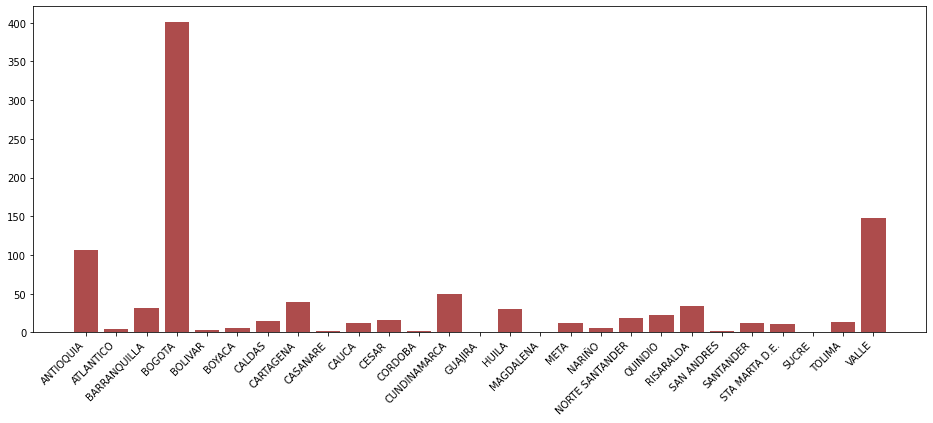

In [69]:
#graficar la cantidad de casos por departamento
fig, ax= plt.subplots(figsize=(16,6))
#https://matplotlib.org/stable/gallery/color/named_colors.html
ax.bar(x=cd.index, height=cd['count'], color='darkred', alpha=0.7)
#https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.xticks(rotation=45, ha='right')
plt.show()

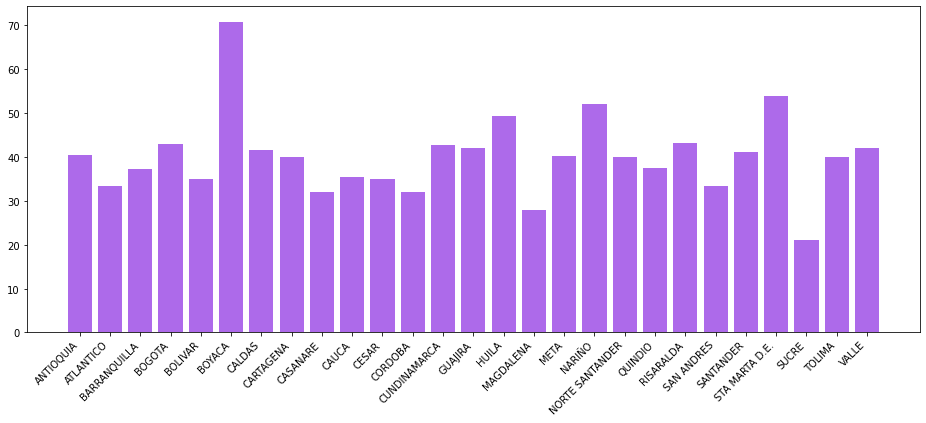

In [74]:
#graficar promedio de edad por departamento
fig, ax= plt.subplots(figsize=(16,6))
#https://matplotlib.org/stable/gallery/color/named_colors.html
ax.bar(x=cd.index, height=cd['mean'], color='blueviolet', alpha=0.7)
#https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.xticks(rotation=45, ha='right')
plt.show()

In [103]:
#acumulado de casos por cada dia

In [104]:
covid.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'per_etn_', 'nom_grupo_'],
      dtype='object')

In [107]:
for fecha in ['fecha_reporte_web', 'fecha_de_notificaci_n', 'fecha_inicio_sintomas', 'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado']:
    covid[fecha]= pd.to_datetime(covid[fecha],format='%d/%m/%Y %H:%M:%S')

In [108]:
#acumulado de casos por dia
cf = covid.groupby(['fecha_diagnostico'])[['edad']].describe()
cf.columns = cf.columns.droplevel(0)
cf

,count,mean,std,min,25%,50%,75%,max
fecha_diagnostico,,,,,,,,
2020-03-06,1.0,19.000000,NaN,19.0,19.00,19.0,19.00,19.0
2020-03-09,2.0,42.000000,11.313708,34.0,38.00,42.0,46.00,50.0
2020-03-11,6.0,40.333333,24.945273,22.0,25.50,27.5,48.25,85.0
2020-03-12,4.0,55.000000,18.797163,36.0,40.50,55.0,69.50,74.0
2020-03-13,5.0,50.600000,13.685759,30.0,48.00,49.0,61.00,65.0
2020-03-14,15.0,40.666667,18.668792,18.0,24.50,36.0,54.00,73.0
2020-03-15,20.0,44.250000,16.904920,23.0,29.75,41.5,56.00,79.0
2020-03-16,14.0,34.785714,14.550594,20.0,24.50,31.0,36.25,64.0
2020-03-17,25.0,40.040000,15.415036,9.0,29.00,42.0,53.00,72.0


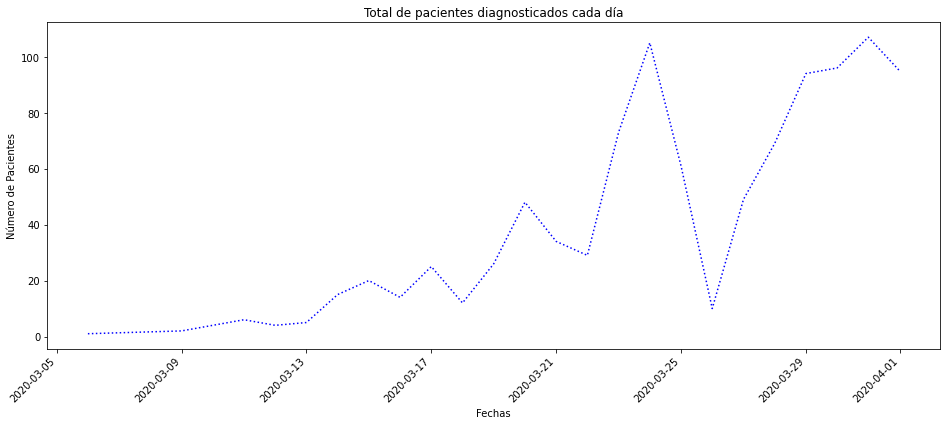

In [109]:
# Total de pacientes diagnosticados cada día
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(cf.index, cf['count'], 'b:')
ax.set(title='Total de pacientes diagnosticados cada día', xlabel='Fechas', ylabel='Número de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
cf['acumulados'] = cf['count'].cumsum()

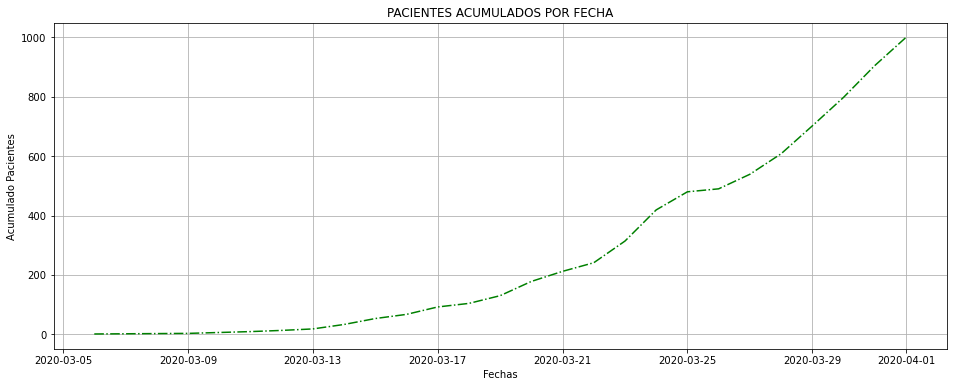

In [111]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(cf.index, cf['acumulados'], 'g-.')
ax.set(title='PACIENTES ACUMULADOS POR FECHA', xlabel='Fechas', ylabel='Acumulado Pacientes')
#plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()